In [17]:
#import everything here
import numpy as np
import pandas as pd
import quandl
import matplotlib.pyplot as plt

Calculating the Simple moving average(SMA) of an equity price over a period (Middle Band)
Upper/Lower Bands = 2 S.D. from the middle band

In [18]:
#API data import

quandl.ApiConfig.api_key = "fYkH3s6N_8cAWa98E-JH"  #To ensure that my requests to Quandl are authenticated
API_key = "fYkH3s6N_8cAWa98E-JH"  #will be imported to git.ignore later

#curl "https://www.quandl.com/api/v3/datasets/WIKI/FB.json?column_index=4&start_date=2014-01-01&end_date=2014-12-31&collapse=monthly&transform=rdiff&api_key=YOURAPIKEY"

#End of day prices, indices, and additional information for companies trading on 
#the Bombay Stock Exchange in India.

meta_data = pd.read_csv('BSE_metadata.csv') #read meta data so we can understand the API request convention more easily
print(meta_data)

           code                                              name  \
0     BOM500002                      ABB India Limited EOD Prices   
1     BOM500003                   AEGIS LOGISTICS LTD. EOD Prices   
2     BOM500008              AMARA RAJA BATTERIES LTD. EOD Prices   
3     BOM500009      AMBALAL SARABHAI ENTERPRISES LTD. EOD Prices   
4     BOM500010  HOUSING DEVELOPMENT FINANCE CORP.LTD. EOD Prices   
...         ...                                               ...   
5117   SPBSS5IP                                     BSE SENSEX 50   
5118   SPBSSSIP                         BSE SmallCap Select Index   
5119   SPBSTLIP                                       BSE Telecom   
5120   SPBSUTIP                                     BSE Utilities   
5121   SPICBLOT                             BSE Liquid Rate Index   

                                            description         refreshed_at  \
0     End of Day prices and additional trading infor...  2023-09-01 14:24:43   
1     End o

In [19]:
#Calling the data for calculating SMA
data = quandl.get('BSE/SENSEX', start_date='2009-10-05', end_date='2019-10-05') #SENSEX = the most widely traded indian index
print(data)

                Open      High       Low     Close
Date                                              
2009-10-05  17062.01  17062.01  16835.80  16866.41
2009-10-06  16879.38  16988.56  16622.05  16958.54
2009-10-07  17069.42  17120.56  16764.07  16806.66
2009-10-08  16908.02  16998.52  16775.36  16843.54
2009-10-09  16915.96  16963.08  16606.95  16642.66
...              ...       ...       ...       ...
2019-09-27  39003.13  39107.37  38782.60  38822.57
2019-09-30  38873.12  38873.12  38401.09  38667.33
2019-10-01  38813.48  38923.78  37929.89  38305.41
2019-10-03  38137.87  38310.93  37957.56  38106.87
2019-10-04  38401.49  38403.54  37633.36  37673.31

[2480 rows x 4 columns]


A simple moving average is calculated by adding up the last “X” period’s closing prices and then dividing that number by X.

/var/folders/sh/jlgn2vb117v7tyhz7c68zk880000gn/T/ipykernel_2650/1211172121.py:23: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(df.index.to_numpy(), df.Close.to_numpy(),"r--",linestyle='solid')
/var/folders/sh/jlgn2vb117v7tyhz7c68zk880000gn/T/ipykernel_2650/1211172121.py:25: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(df.index.to_numpy(), df.Upper_Band.to_numpy(),"b--",linestyle='solid')
/var/folders/sh/jlgn2vb117v7tyhz7c68zk880000gn/T/ipykernel_2650/1211172121.py:26: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(df.index.to_numpy(), df.Lower_Band.to_numpy(),"b--",linestyle='solid')


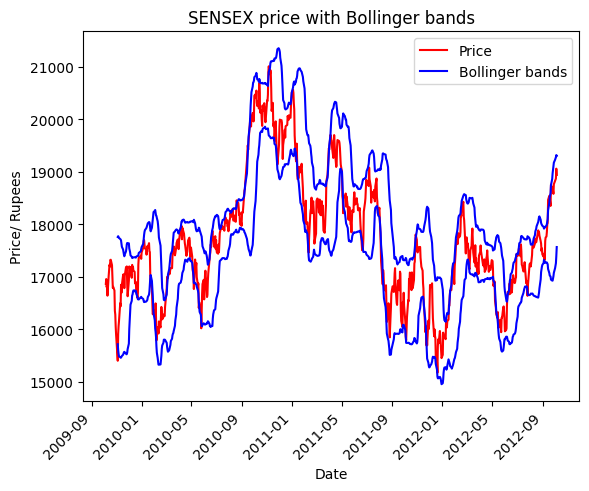

In [20]:
#Function calculating the SMA 
# Load historical price data into a DataFrame

#Load from 2009 to 2012 for visual illustration purposes
df = quandl.get('BSE/SENSEX', start_date='2009-10-05', end_date='2012-10-05')

# Define the period and standard deviation multiplier
period = 20  # 20 days is apparently a medium-term indicator.
std_multiplier = 2  # Multiplier for standard deviation

# Calculate the rolling mean (middle band) and rolling standard deviation

#calculates the rolling mean of the closing price by 
# creating a rolling window of 'period'length and calculating the mean value within each window.
df['Middle_Band'] = df['Close'].rolling(window=period).mean()


df['Upper_Band'] = df['Middle_Band'] + (df['Close'].rolling(window=period).std() * std_multiplier)
df['Lower_Band'] = df['Middle_Band'] - (df['Close'].rolling(window=period).std() * std_multiplier)


plt.title("SENSEX price with Bollinger bands")
plt.plot(df.index.to_numpy(), df.Close.to_numpy(),"r--",linestyle='solid')
#plt.plot(df.index.to_numpy(), df.Middle_Band.to_numpy(),"r--",linestyle='dotted')
plt.plot(df.index.to_numpy(), df.Upper_Band.to_numpy(),"b--",linestyle='solid')
plt.plot(df.index.to_numpy(), df.Lower_Band.to_numpy(),"b--",linestyle='solid')
plt.legend(["Price","Bollinger bands"])
plt.xlabel("Date")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Price/ Rupees")
plt.show()


In [21]:
# Generate buy and sell signals
df['Signal'] = 0  # Initialize signal column

# Buy signal: Price crosses below the lower Bollinger Band
# Negative to our ledger because we're buying (putting money in)
df.loc[df['Close'] < df['Lower_Band'], 'Signal'] = -1 

# Sell signal: Price crosses above the upper Bollinger Band
# Positive to our ledger because we're selling (getting money back)
df.loc[df['Close'] > df['Upper_Band'], 'Signal'] = +1


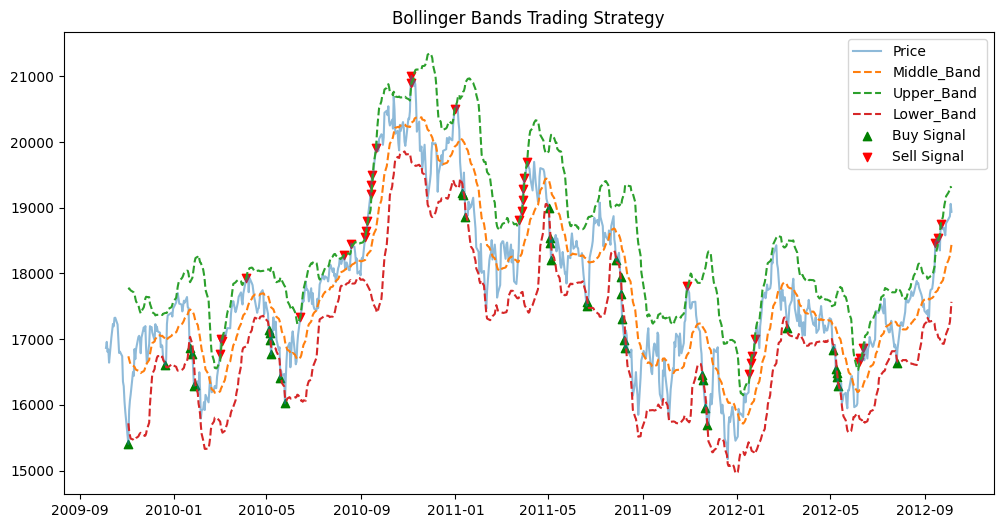

In [22]:
# Plot Bollinger Bands and trading signals

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Price', alpha=0.5)
plt.plot(df['Middle_Band'], label='Middle_Band', linestyle='--')
plt.plot(df['Upper_Band'], label='Upper_Band', linestyle='--')
plt.plot(df['Lower_Band'], label='Lower_Band', linestyle='--')

# Plot buy signals as green arrows
plt.scatter(df.index[df['Signal'] == -1], df['Close'][df['Signal'] == -1], marker='^', color='g', label='Buy Signal', alpha=1)

# Plot sell signals as red arrows
plt.scatter(df.index[df['Signal'] == +1], df['Close'][df['Signal'] == +1], marker='v', color='r', label='Sell Signal', alpha=1)

plt.title('Bollinger Bands Trading Strategy')
plt.legend()
plt.show()

Exit strategies(stop-loss and take profit), Position sizing 

In [23]:
# Follow the buy and sale signals with the same positon sizing for now
 
df['Position'] = df['Signal'] * df['Close']

# Create a dataframe object of all trades according to our model

'''
#to confirm that the positions are not all zeros
count = 0 
for position in df['Position']:
    if position != 0.0:
        count +=1
print(count)
'''

trading_balance = df['Position'].sum()
print(trading_balance)

'''
ledger_column = ['Date','Position']
ledger = pd.DataFrame(columns = ledger_column)
ledger.set_index('Date', inplace=True)
'''
ledger = df.loc[df['Position'] != 0]
print(ledger)


-25982.97999999998
                Open      High       Low     Close  Middle_Band    Upper_Band  \
Date                                                                            
2009-11-03  15838.63  15957.06  15330.56  15404.94   16739.1840  17758.960095   
2009-12-21  16724.84  16750.99  16577.78  16601.20   17007.2865  17399.129072   
2010-01-22  16978.36  17000.33  16608.09  16859.68   17450.7330  17866.554083   
2010-01-25  16847.70  16877.77  16705.56  16780.46   17428.2005  17933.370911   
2010-01-27  16708.60  16708.60  16230.85  16289.82   17374.6610  18092.288460   
...              ...       ...       ...       ...          ...           ...   
2012-06-12  16570.51  16897.42  16553.47  16862.80   16278.2270  16833.205112   
2012-07-26  16887.84  16899.77  16598.48  16639.82   17241.7600  17773.154993   
2012-09-14  18284.75  18498.54  18284.75  18464.27   17708.0765  18266.344354   
2012-09-17  18619.90  18715.03  18480.54  18542.31   17740.9290  18409.527698   
2012-09-2

In [24]:
#Performance measurement -> using annualised Shrpe ratio 


In [25]:
#Test it on the other chuck of time period 